# 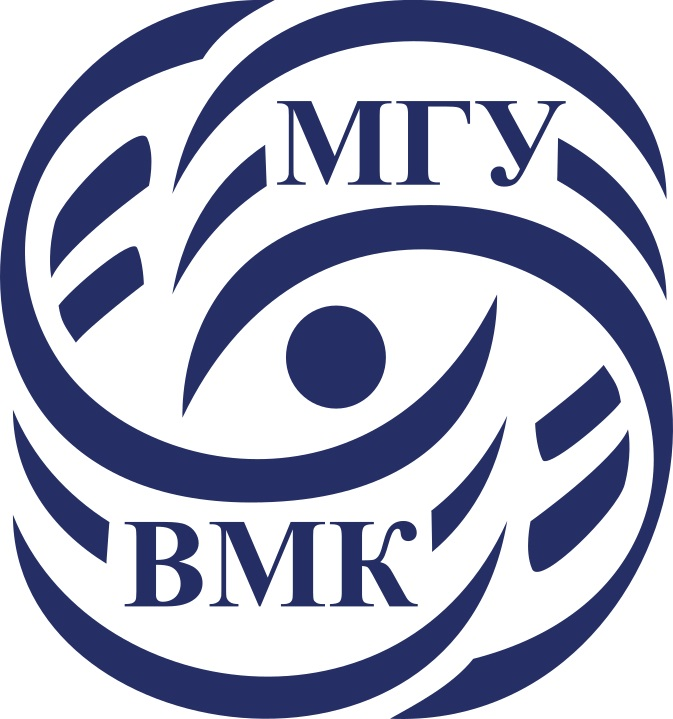

# Машинное обучение. ВМК МГУ

# Практическое задание 12: Кластеризация. Методы снижения размерности.





## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







__В этом задании вы..:__

* Познакомитесь с одним способом визуализации процесса обучения
* Сравните между собой результаты разных способов кластеризации
* Посмотрите и реализуете несколько метрик качества кластеризации
* Попробуете разные методы снижения размерности

----

<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>**

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

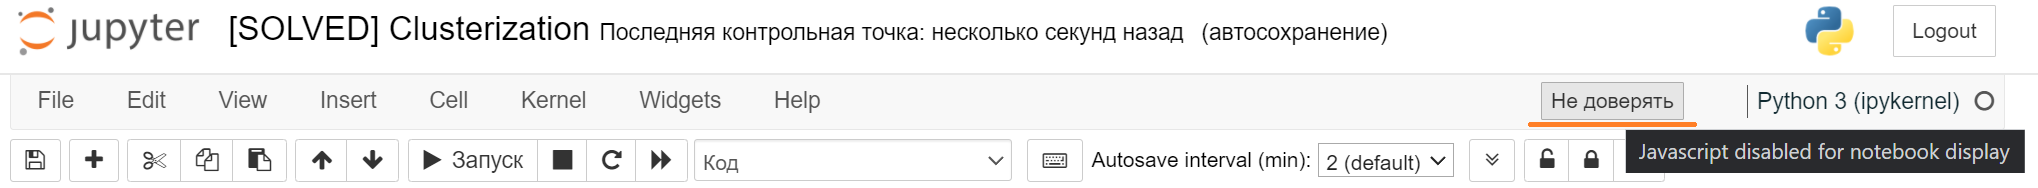

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

-----

<font color='OrangeRed'>**Важно!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

Обратите внимание, что установка `torch` и `tensorflow` через `pip `может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении

In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
! pip install -r /content/requirements_2024_25_for_colab_full.txt

In [1]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# <font color='DarkOrange'>0. Введение. [1 балл]</font>

## 0.1 О задании

В данной работе вам предстоит познакомится с методами машинного обучения без учителя — кластеризацией и алгоритмами снижения размерности.

 Рекомендуется использовать Kaggle так как в нём корректно работают интерактивные визуализации.

Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [2]:
import os

import gdown

import scipy

import numpy as np
import pandas as pd

import tqdm.auto as tqdm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from ipywidgets import (
    interactive,
    fixed,
    interact_manual,
    IntSlider,
    FloatLogSlider,
    FloatSlider,
    Dropdown,
)

import torch
from torchvision.datasets import CIFAR10

# Необходима преварительная установка tensorflow
from keras.applications.inception_v3 import InceptionV3, preprocess_input

import sklearn

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Библиотека umap-learn, а не umap
from umap import UMAP
from sklearn.manifold import TSNE, Isomap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise_distances

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

from itertools import product

In [ ]:
# для автоформаттера black (PEP8)
# юзать: %%black в начале ячейки

!pip install blackcellmagic
%load_ext blackcellmagic

## <font color='DarkOrange'>0.3 Введение в интерактивные графики jupyter notebook [кросспроверка 1 балл]</font>

Информация об особенностях интерактивных графиков вынесена в отдельный ноутбук `Deep dive into .ipynb.ipynb`. **Ознакомьтесь с ним перед дальнейшим выполнением задания!**

#### **Задание 0.0 [кросспроверка, 1 балл][код, вопрос]**
* Поиграйтесь с интерактивными графиками.
* Посмотрите в чём заключается смысл функций [`interactive`, `interact_manual`, `fixed`, `IntSlider`, `FloatLogSlider`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).
* Какие ещё [слайдеры и динамические виджеты бывают](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)?
* Как вам кажется, удобный ли это инструмент?
* Предложите несколько примеров, когда он мог бы ещё пригодиться.

In [ ]:
def plot_sin(frequency=1, amplitude=1):
    x = np.linspace(0, 10, 500)
    y = amplitude * np.sin(2 * np.pi * frequency * x)
    plt.plot(x, y)
    plt.ylim(-3, 3)
    plt.title(rf"Plot of $\sin(2 \pi x \times {frequency})$ with amplitude = {amplitude}")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.show()


interactive_plot = interactive(
    plot_sin,
    frequency=IntSlider(min=1, max=10, step=1, value=1),
    amplitude=FloatSlider(min=0.1, max=5, step=0.1, value=1),
)
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='frequency', max=10, min=1), FloatSlider(value=1.0, descr…

Продублирую один статический график:

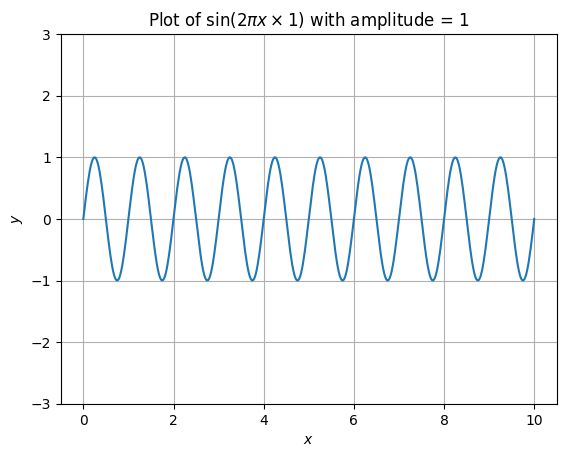

In [ ]:
plot_sin(frequency=1, amplitude=1)

In [ ]:
def plot_power(base=2, exponent=1):
    x = np.linspace(0, 10, 100)
    y = base ** (exponent * x)
    plt.plot(x, y)
    plt.title(rf"Plot of ${base}^{{{exponent} \cdot x}}$")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.show()


interactive_plot = interact_manual(
    plot_power,
    base=fixed(2),
    exponent=FloatLogSlider(value=1, base=10, min=-1, max=2, step=0.1),
)
display(interactive_plot)

interactive(children=(FloatLogSlider(value=1.0, description='exponent', max=2.0, min=-1.0), Button(description…

<function __main__.plot_power(base=2, exponent=1)>

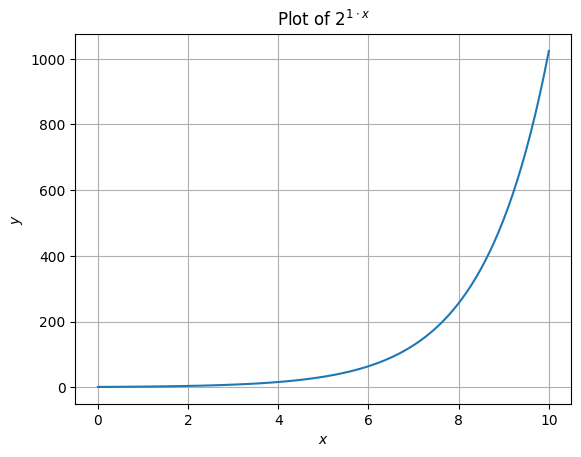

In [ ]:
plot_power(base=2, exponent=1)

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

**Смысл функций:**  
*   **interactive** создает интерактивные виджеты для параметров функции,
обновления происходят *сразу* при изменении параметров  
*   **interact_manual** создает интерактивные виджеты для параметров функции, обновления происходят при изменении параметров и последующем *нажатии* кнопки (что удобно при "дорогих" вычислениях)
*   **fixed** фиксирует значение аргумента функции  
*   **IntSlider** — слайдер для целочисленных значений в заданном диапазоне  
*   **FloatLogSlider** — слайдер с логарифмической шкалой для вещественных чисел

**Еще наиболее интересными и полезными показались:**  
*   **Числовые:** IntSlider, FloatSlider, IntText, FloatText, IntProgress, FloatProgress и др. Ввод чисел и индикаторы прогресса  
*   **Булевы:** Checkbox, Valid. Для выбора логических значений  
*   **Выбор:** Dropdown, RadioButtons, Select, SelectionSlider, SelectMultiple. Для выбора одного или нескольких вариантов из списка  
*   **Строковые:** Text, Textarea, Combobox. Для ввода текста  
*   **Контейнерные/компоновки:** Box, HBox, VBox, GridBox, Accordion. Для группировки и компоновки других виджетов в удобные структуры интерфейса  

Инструмент удобный, позволяет быстро и наглядно понять, как изменения параметров влияют на результаты, не изменяя при этом ячейки с кодом

**Может пригодиться:**  
*   Для быстрого исследования влияния параметров на графики, распределения, корреляции и статистику. Например, можно менять параметры фильтрации, размер выборки или пороги
*   Для демонстрации математических функций, статистических распределений
и др. с изменяемыми параметрами
*   Для подбора гиперпараметров машинного обучения для малых наборов данных, визуализации их влияния на работу модели
*   Для интерактивного выбора столбцов, диапазонов, категорий для анализа и визуализации

**<font color='OrangeRed'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='OrangeRed'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>**

In [ ]:
# %matplotlib inline
# plt.rcParams['figure.dpi'] = 300

## 0.4 Ещё несколько важных замечаний

При выполнении задания запрещено:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='DarkOrange'>1. Кластеризация на синтетических данных. [кросспроверка 5 балла,  unittests 4 балла]</font>

В данной части мы рассмотрим несколько наборов синтетических данных и сравним как разные алгоритмы кластеризации ведут себя в низкоразмерных и высокоразмерных пространствах

## a. Двумерные данные

Сгенерируем двумерные данные с $4$ естественными кластерами разного размера и плотности.

In [ ]:
data_moons, labels_moons = make_moons(
    n_samples=300, shuffle=True, noise=0.09, random_state=6417
)
data_moons, labels_moons = (
    data_moons[labels_moons == 0],
    labels_moons[labels_moons == 0],
)

data_blobs, labels_blobs = make_blobs(
    n_samples=500,
    n_features=2,
    centers=[(0, -0.2), (-1.5, -1.5), (-1.5, 1.5)],
    cluster_std=[0.2, 0.4, 0.6],
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=6417,
    return_centers=False,
)

data = np.concatenate([data_moons, data_blobs])
labels = np.concatenate([labels_moons, labels_blobs + 1])

Определим вспомогательную функцию для отрисовки двумерных кластеризованных данных. При выполенении задания желательно пользоваться этой функцией для визуализации. При необходимости можете менять сигнатуру и поведение функции как вам удобно, _оставляя стиль отрисовки в целом неизменным_.

In [6]:
def plot_2d_data(data, labels, title="Исходные данные", cmap="tab20", ax=None):
    """
    Отрисовка 2d scatter plot.
    :param np.ndarray data: 2d массив точек
    :param Union[list, np.ndarray] labels: список меток для каждой точки выборки
    :param str title: Заголовок графика
    :param str cmap: Цветовая палитра
    :param ax Optional[matplotlib.axes.Axes]: Оси для отрисовки графика.
        Если оси не заданы, то создаётся новая фигура и сразу же происходит её отрисовка
        Иначе, график добавляется на существуюущие оси. Отрисовки фигуры не происходит
    """
    n_clusters = len(np.unique(labels))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    else:
        fig = None

    scatter = ax.scatter(
        data[:, 0], data[:, 1], c=labels, cmap=plt.get_cmap(cmap, n_clusters)
    )

    cbar = plt.colorbar(scatter, label="Cluster Number", ax=ax)
    if n_clusters > 10:
        ticks = np.linspace(np.min(labels), np.max(labels), 10)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels([f'{int(t)}' for t in ticks])
    else:
        cbar.set_ticks(
            np.min(labels) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters
        )
        cbar.set_ticklabels(np.unique(labels))

    ax.set_title(title)
    ax.grid(True)

    if fig is not None:
        fig.tight_layout()
        plt.show()

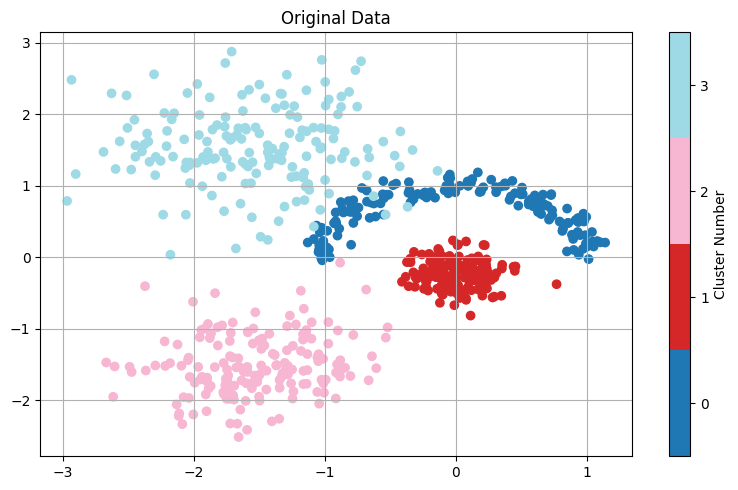

In [ ]:
plot_2d_data(data, labels, title='Original Data', cmap='tab20')

#### <font color='DarkOrange'>**Задание 1.a.1 [кросспроверка, 1 балл][код]** </font>
<a id='task_1.a.1'></a>
Запустите следующие алгоритмы кластеризации на данной выборке: `KMeans`, `DBSCAN`, `AgglomerativeClustering`. Визуально подберите наилучшие параметры для этих алгоритмов (`n_clusters`, `eps`, `min_samples`, `linkage`). Изобразите наилучшие получившиеся разбиения на графиках.

<font color='LightSteelBlue'>**Советы**</font>
1. Можете использовать виджеты для ручного подбора параметров
2. Используйте `plot_2d_data` для отрисовки графиков. Обязательно меняйте заголовок
3. **<font color='OrangeRed'>Помните, динамический контент может не сохраняться в ноутбуке. Поэтому после подбора оптимальных параметров нарисуйте соответствующий рисунок в статическом режиме</font>**

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

##### KMeans

In [ ]:
def kmeans(n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init='auto')
    model.fit(data_scaled)
    labels = model.predict(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_2d_data(data_scaled, labels, title=f"KMeans (n_clusters={n_clusters})", ax=ax)

    centers = model.cluster_centers_
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="x",
        s=200,
        linewidths=3,
        color="black",
        zorder=10,
        label="Centroids",
    )
    ax.legend()
    plt.show()


interactive_plot = interactive(
    kmeans, n_clusters=IntSlider(min=2, max=8, step=1, value=4)
)
display(interactive_plot)

interactive(children=(IntSlider(value=4, description='n_clusters', max=8, min=2), Output()), _dom_classes=('wi…

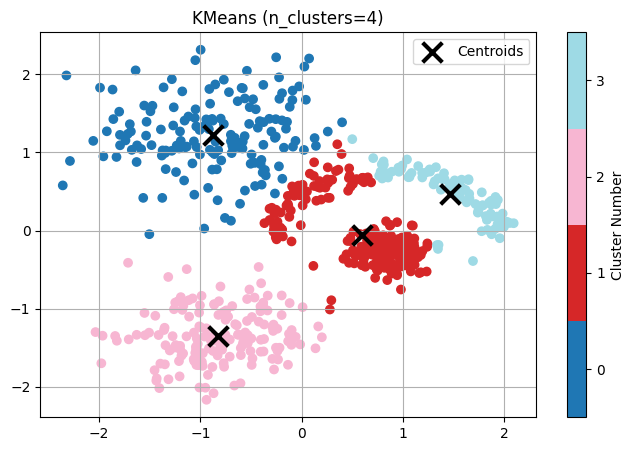

In [ ]:
kmeans(n_clusters=4)

Поскольку KMeans минимизирует сумму квадратов расстояний от каждой точки до центроида своего кластера, он хорошо работает с **компактными и разделимыми кластерами**. Однако это также накладывает некоторые "ограничения"

KMeans предполагает, что кластеры имеют **выпуклую форму** (то есть если соединить любые две точки в кластере прямой линией, то все точки этой линии также будут принадлежать кластеру). Однако данные, например, содержат полумесяц, который не является выпуклым. KMeans пытается "разрезать" его, что приводит к тому, что часть его точек относится к другим кластерам

KMeans также предполагает, что все кластеры имеют примерно **одинаковую дисперсию**. Если это не так, то KMeans может "притягивать" точки из других кластеров к кластеру или разбивать его на несколько кластеров. В наших данных, например, один из кластеров (левый кластер сверху) имеет значительно большую дисперсию, чем другие, поэтому часть его точек была отнесена к другому кластеру

##### DBSCAN

In [ ]:
def dbscan(eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_2d_data(
        data_scaled, labels, title=f"DBSCAN (eps={eps:.2f}, min_samples={min_samples})", ax=ax
    )
    plt.show()


interactive_plot = interactive(
    dbscan,
    eps=FloatSlider(min=0.05, max=1.0, step=0.05, value=0.3),
    min_samples=IntSlider(min=1, max=20, step=1, value=15),
)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.3, description='eps', max=1.0, min=0.05, step=0.05), IntSlider(value…

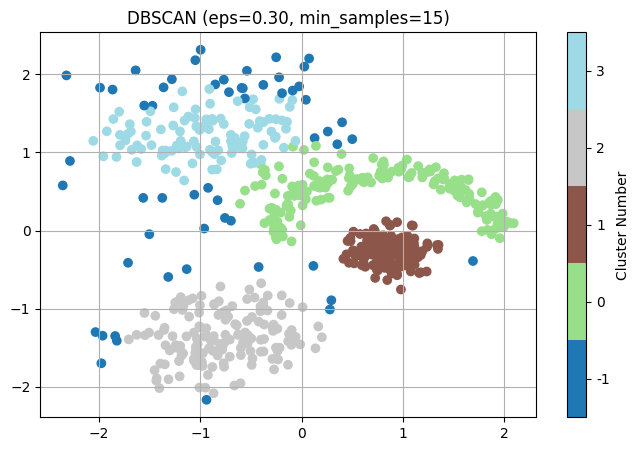

In [ ]:
dbscan(eps=0.3, min_samples=15)

 Параметр `eps` определяет, насколько близки должны быть точки друг к другу, чтобы считаться частью одного кластера  
 Параметр `min_samples` определяет, сколько точек должно быть в окрестности, чтобы точка считалась "основной"

На основе того, как устроены данные метрически (**насколько плотно** были расположены сэмплы внутри кластера, как близко были расположены сэмплы кластеров в принципе), алгоритм хорошо выделил 4 кластера. Еще несколько сэмплов отнес к шуму, потому что они достаточно обособленные (находятся далеко, содержат в своей окрестности мало других сэмплов при таких параметрах)

##### Agglomerative Clustering

In [ ]:
def agglomerative(n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels_pred = model.fit_predict(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_2d_data(
        data_scaled,
        labels_pred,
        title=f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})",
        ax=ax,
    )
    plt.show()


interactive_plot = interactive(
    agglomerative,
    n_clusters=IntSlider(min=2, max=8, step=1, value=4),
    linkage=Dropdown(options=["ward", "complete", "average", "single"], value="ward"),
)
display(interactive_plot)

interactive(children=(IntSlider(value=4, description='n_clusters', max=8, min=2), Dropdown(description='linkag…

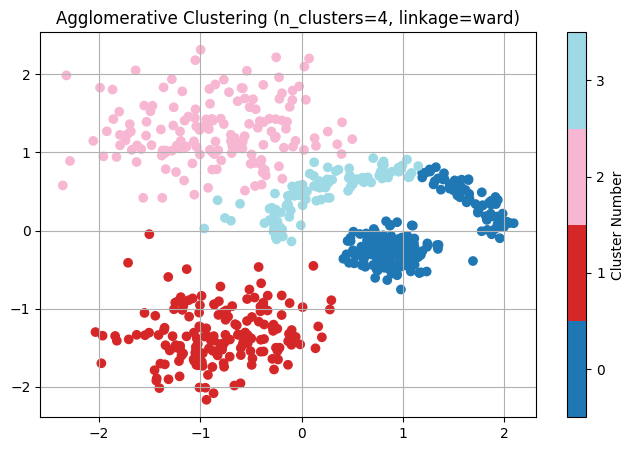

In [ ]:
agglomerative(n_clusters=4, linkage="ward")

Агломеративная кластеризация с визуально наилучшими параметрами `n_clusters=4` и `linkage='ward'` показала результаты схожие с KMeans. Она достаточно хорошо выделила три плотных кластера. Однако также не смогла корректно обработать полумесяц, разделив его на части, потому что алгоритм склонен формировать кластеры, которые тоже имеют тенденцию быть выпуклыми или связанными компактными группами. `Ward linkage` хорошо работает с компактными и сферическими кластерами, но плохо справляется с кластерами сложной формы как, например, этот полумесяц

Вообще говоря, агломеративная кластеризация по своему устройству лучше всего подходит для кластеров:
*   выпуклых, которые имеют тенденцию быть "округлыми" или "компактными"
*   схожего размера
*   примерно одинаковой дисперсии

Способы связи:
*   ward: хорошо подходит для кластеров с одинаковой дисперсией
*   complete: чувствителен к выбросам, но может хорошо разделять кластеры, которые имеют четкую границу
*   average: менее чувствителен к выбросам, чем complete
*   single: может хорошо выделять цепочки кластеров, но склонен к слиянию кластеров

Остальные способы связи отработали не лучше из-за того, как устроены расстояния между сэмплами одного кластера и разных (максимальное, минимальное, среднее)



#### <font color='DarkOrange'>**Задание 1.a.2 [кросспроверка, 0.5 балла][вопрос]**</font>
Основываясь на знании о работе данных алгоритмов, объясните, почему кластеры были сформированы таким образом. Какой алгоритм лучше всего работает на предложенных данных?

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Объяснения в отношении каждого алгоритма даны после каждого графика отдельно: так удобнее сравнивать

Лучше всего справился **DBSCAN**: он успешно выделил кластер сложной формы (полумесяц), автоматически определил количество кластеров (4) и в целом получил разбиение близкое к исходному

## b. Многомерные данные. Снижение размерности

Теперь попробуем кластеризовать данные в высокоразмерном пространстве. Существенным отличием от двумерного случая является невозможность прямой визуальной оценки кластеризации.

Одним из наглядных способов оценки кластеризации является снижение размерности. В данной части вам предлагается использовать алгоритм `TSNE` для визуализации данных.

<font color='CornflowerBlue'>**t-SNE (t-распределенное стохастическое вложение соседей)**</font> — это алгоритм используемый для сокращения размерности данных, а также для визуализации многомерных данных в 2D или 3D, сохраняя их «структуру». Он фокусируется на том, чтобы близкие точки в исходном пространстве оставались близкими в новом, а далёкие — не обязательно. Для этого t-SNE моделирует сходство между точками в высоком измерении (через условные вероятности) и в низком (через распределение Стьюдента), затем итеративно подгоняет проекции, минимизируя разницу между этими сходствами. В итоге кластеры или локальные паттерны становятся видимыми, но абсолютные расстояния и глобальная структура могут искажаться. Алгоритм полезен для исследования данных, но требует осторожности в интерпретации.

In [4]:
data, labels = make_classification(
    n_samples=1000,
    n_features=200,
    n_informative=100,
    n_repeated=0,
    n_classes=5,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=2.5,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=6417,
)

####<font color='DarkOrange'>**Задание 1.b.1 [кросспроверка, 0.5 балла][код, вопрос]**</font>
Примените алгоритм `TSNE` для снижения размерности до двух. Учтите, что `TSNE` суть есть метрический алгоритм и существенно зависит от масштаба признаков — некорректный и различающийся масштаб признаков гарантированно приведёт к неинтерпретируемым результатам. Можете попробовать подобрать гиперпараметры алгоритма для получения лучшей визуализации.

Изобразите получившиеся низкоразмерные вектора. Получилось ли сохранить кластеры при переходе в низкоразмерное пространство?

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
def tsne(perplexity, learning_rate, n_iter):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        n_iter=n_iter,
        init="pca",
        random_state=6417,
        verbose=0,
    )
    data_tsne = tsne.fit_transform(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plot_2d_data(
        data_tsne,
        labels,
        title=f"t-SNE (perplexity={perplexity}, learning_rate={learning_rate}, n_iter={n_iter})",
        ax=ax,
    )
    plt.show()


interactive_plot = interact_manual(
    tsne,
    perplexity=IntSlider(min=5, max=50, step=5, value=40, description="Perplexity"),
    learning_rate=FloatSlider(
        min=10, max=1000, step=10, value=130, description="Learning Rate"
    ),
    n_iter=IntSlider(min=250, max=2000, step=250, value=1500, description="N Iter"),
)
display(interactive_plot)

interactive(children=(IntSlider(value=40, description='Perplexity', max=50, min=5, step=5), FloatSlider(value=…

<function __main__.tsne(perplexity, learning_rate, n_iter)>

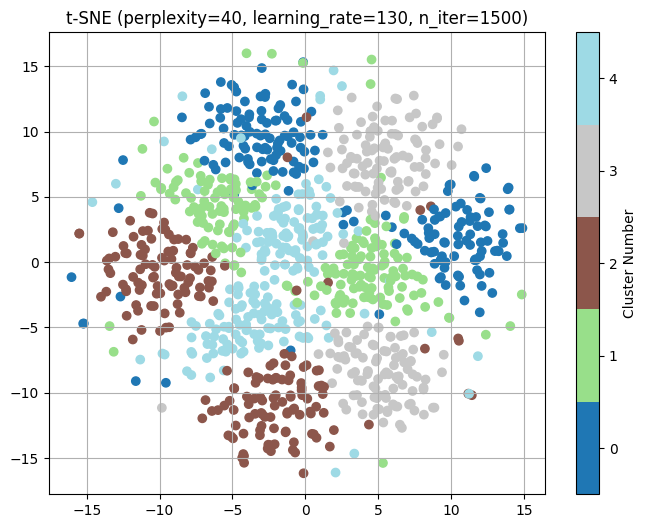

In [8]:
tsne(perplexity=40, learning_rate=130, n_iter=1500)

In [9]:
tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate=130,
    n_iter=1500,
    init="pca",
    random_state=6417,
    verbose=0,
)

data_tsne = tsne.fit_transform(data_scaled)

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Кластеры неплохо разделены визуально, хотя есть некоторое смешивание точек на границах кластеров. В целом t-SNE неплохо уловил некоторую структуру данных


#### <font color='DarkOrange'>**Задание 1.b.2 [кросспроверка, 0.5 балла][код]**</font>
Примените алгоритмы кластеризации из предыдущего пункта к новым данным. Изобразите получившиеся кластеры в векторном пространстве, полученном с помощью `TSNE`. Не забудьте подобрать оптимальные параметры (те же, что и в пункте [**1.a.1**](#task_1.a.1)) для всех алгоритмов. Помните, что большинство алгоритмов кластеризации также являются метрическими и существенно зависят от масштаба признаков.

<font color='OrangeRed'>**Замечание:**</font> Обратите внимание, что применять алгоритмы кластеризации нужно к высокоразмерным векторам, а низкоразмерные вектора необходимо использовать только для визуализации.

##### KMeans

In [13]:
def kmeans(n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=6417)
    labels_pred = model.fit_predict(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plot_2d_data(
        data_tsne,
        labels_pred,
        title=f"KMeans (n_clusters={n_clusters}) на t-SNE",
        ax=ax,
    )
    plt.show()


interactive_plot = interactive(
    kmeans,
    n_clusters=IntSlider(min=6, max=20, step=1, value=11, description="n_clusters"),
)
display(interactive_plot)

interactive(children=(IntSlider(value=11, description='n_clusters', max=20, min=6), Output()), _dom_classes=('…

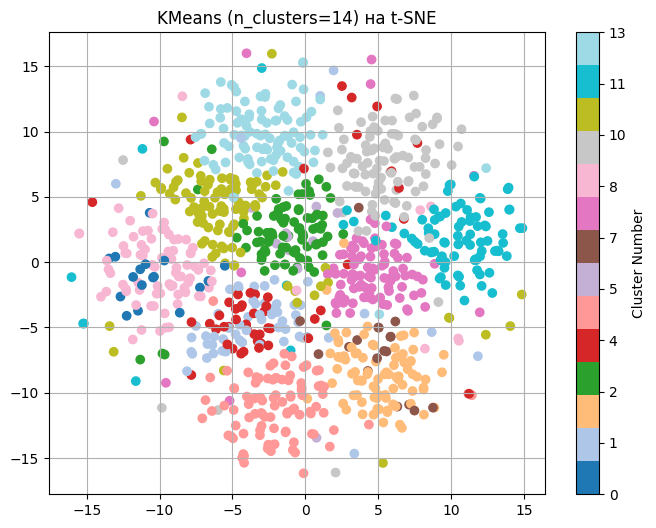

In [15]:
kmeans(n_clusters=14)

##### DBSCAN

In [17]:
def dbscan(eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels_pred = model.fit_predict(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plot_2d_data(
        data_tsne,
        labels_pred,
        title=f"DBSCAN (eps={eps:.2f}, min_samples={min_samples}) на t-SNE",
        ax=ax,
    )
    plt.show()


interactive_plot = interactive(
    dbscan,
    eps=FloatSlider(min=13.0, max=18.0, step=0.5, value=17.0, description="eps"),
    min_samples=IntSlider(min=1, max=20, step=1, value=13, description="min_samples"),
)
display(interactive_plot)

interactive(children=(FloatSlider(value=17.0, description='eps', max=18.0, min=13.0, step=0.5), IntSlider(valu…

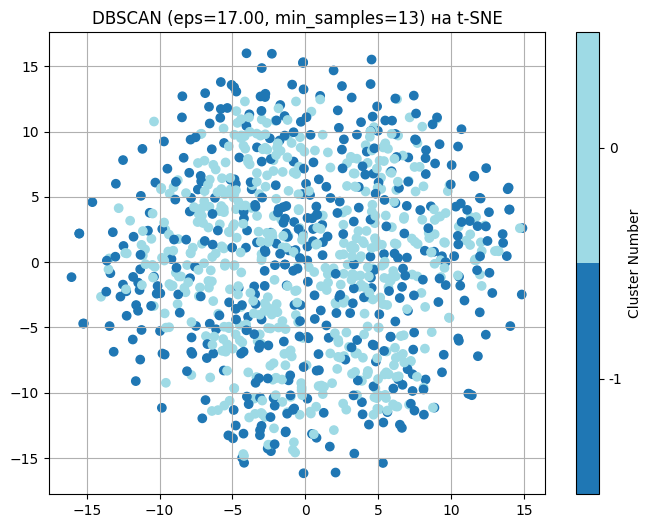

In [ ]:
dbscan(eps=17., min_samples=13)

##### Agglomerative Clustering

In [19]:
def agglomerative(n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels_pred = model.fit_predict(data_scaled)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plot_2d_data(
        data_tsne,
        labels_pred,
        title=f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage}) на t-SNE",
        ax=ax,
    )
    plt.show()


interactive_plot = interactive(
    agglomerative,
    n_clusters=IntSlider(min=1, max=20, step=1, value=11, description="n_clusters"),
    linkage=Dropdown(
        options=["ward", "complete", "average", "single"],
        value="ward",
        description="linkage",
    ),
)
display(interactive_plot)

interactive(children=(IntSlider(value=11, description='n_clusters', max=20, min=1), Dropdown(description='link…

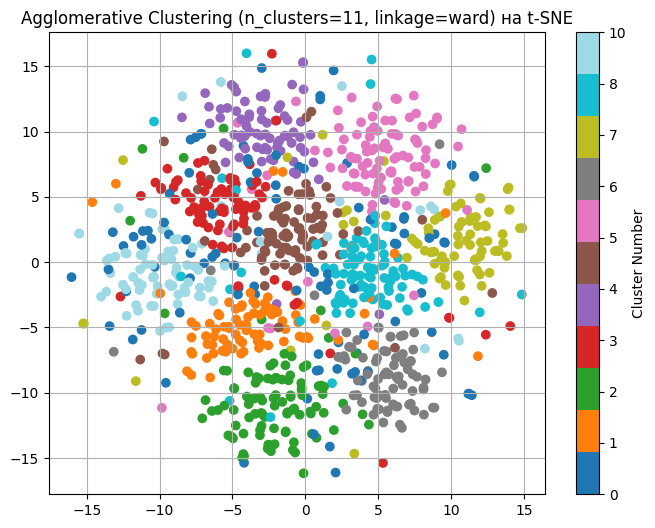

In [20]:
agglomerative(n_clusters=11, linkage="ward")

#### <font color='DarkOrange'>**Задание 1.b.3 [кросспроверка, 0.5 балла][вопрос]**</font>
Опишите получившиеся результаты. Все ли алгоритмы одинаково хорошо разделяют данные? Если какой-то алгоритм не справился с задачей, то предположите почему.

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

KMeans и Agglomerative Clustering в целом неплохо выделили естественные выпуклые кластеры. Визуально лучше всего справился KMeans

DBSCAN не справился: условно выделил всего один кластер и шум. Ввиду большого количества признаков (200) рассматриваемое высокоразмерное пространство, вероятно, довольно разрежено (один из эффектов "проклятия размерности"), и плотностная структура, необходимая для эффективной работы DBSCAN, может быть выражена слабо или не выражена вовсе

## c. Методы оценки кластеризации. Внутренние и внешние метрики.

Визуальная оценка кластеризации при работе с высокоразмерными данными затруднительна, так как существенно зависит от выбранного метода снижения размерности, который может плохо работать на конкретных данных. С другой стороны, визуальная оценка — субъективна. Поэтому необходимы численные оценки качества кластеризации.

В данном разделе вам нужно будет реализовать две метрики кластеризации и проверить их на практике.

Существует два основных подхода к оценке кластеризации — внутренние и внешние метрики. Первые используют только информацию о векторах-признаках объектов и метки кластеров, полученные из алгоритма кластеризации. Внешние же, используют информацию об истинной разметке объектов.

### Silhouette

Метрика `силуэт` является классическим представителем внутренних метрик кластеризации. Её суть заключается в оценке двух параметров, характеризующих выделенные кластеры — компактность и отделимость.

Положим, что $C_{i}$ — номер кластера для объекта $i$.

$s_{i}$ — компактность кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов того же кластера:
$$s_{i} = \frac{1}{|\{j : C_{j} = C_{i}\}| - 1} \sum\limits_{j : C_{j} = C_{i}} || x_{i} - x_{j} ||$$

$d_{i}$ — отделимость кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов второго по близости кластера:
$$ d_{i} = \min_{C: C \neq C_{i}} \frac{1}{|\{j : C_{j} = C\}|} \sum\limits_{j : C_{j} = C} || x_{i} - x_{j} || $$

Тогда силуэт объекта $i$:
$$\text{sil}_{i} = \frac{d_{i} - s_{i}}{\max(d_{i},s_{i})}$$

И, наконец, коэффициент силуэта для выборки определяется как среднее силуэтов объектов:
$$S = \frac{1}{|X|}\sum\limits_{i} \text{sil}_{i}$$

Если кластер состоит из одного объекта, то его силуэт равен нулю.

#### <font color='DarkOrange'>**Задание 1.с.1 [unittests, 2 баллa]**</font>
Реализуйте вычисление коэффициента силуэта для заданного разбиения. Подробная спецификация и описание входных данных к тестам указаны в **описании задания**.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов
2. Используйте не более одного цикла
3. Учтите, что метки кластеров могут идти не по порядку и принимать произвольные значения
4. Если в данных присутствует один кластер, то считайте что силуэт равен 0
5. Если $s_{i} = d_{i} = 0 \Longrightarrow \text{sil}_{i} = 0$
5. Разрешено использовать `sklearn.metrics.pairwise_distances` и аналоги
6. Запрещено использовать любые библиотечные реализации коэффициента силуэта

**Входные данные тестов удовлетворяют одному из следующих ограничений:**
1. Число объектов $n \le 3000$, размерность пространства $d \le 1200$
2. Число объектов $n \le 5000$, размерность пространства $d = 1$

**Несколько важных замечаний:**

<font color='OrangeRed'>**Замечание:**</font> Запрещается пользоваться библиотеками, импорт которых не объявлен в файле с шаблонами функций.

<font color='OrangeRed'>**Замечание:**</font> Задания, в которых есть решения, содержащие в каком-либо виде взлом тестов, дополнительные импорты и прочие нечестные приемы, будут автоматически оценены в $0$ баллов без права пересдачи задания.

<font color='OrangeRed'>**Замечание:**</font> Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные). В случае возникновения ошибки **Time limit** проверьте код на соответствие числа используемых циклов с требованиями к реализации.

<font color='OrangeRed'>**Замечание:**</font> Для самопроверки доступны как публичные тесты (смотрите **описание задания**), так и тесты внутри Jupyter Notebook

In [23]:
def silhouette_score(x, labels):
    """
    :param np.ndarray x: Непустой двумерный массив векторов-признаков
    :param np.ndarray labels: Непустой одномерный массив меток объектов
    :return float: Коэффициент силуэта для выборки x с метками labels
    """
    labels = np.array(labels)
    n = len(labels)

    unique_labels, inverse = np.unique(labels, return_inverse=True)
    n_clusters = len(unique_labels)

    # 1 кластер => 0
    if n_clusters == 1:
        return 0.0

    # D[i, j] — расстояние между объектом i и объектом j
    D = pairwise_distances(x)

    # mask[i, k] — true, если объект i принадлежит кластеру k
    mask = np.zeros((n, n_clusters), dtype=bool)
    mask[np.arange(n), inverse] = True

    # количество объектов в каждом кластере
    cluster_sizes = mask.sum(axis=0)

    # s[i] — среднее расстояние объекта i до других объектов своего кластера
    sum_intra = (D * mask.T[inverse]).sum(axis=1)
    sizes = cluster_sizes[inverse]
    s = np.zeros(n)
    mask_single = sizes == 1
    mask_multi = ~mask_single
    s[mask_multi] = sum_intra[mask_multi] / (sizes[mask_multi] - 1)
    s[mask_single] = 0.0

    # d[i] — минимальное среднее расстояние объекта i до ближайшего другого кластера
    avg_dist_to_clusters = D @ mask / cluster_sizes
    avg_dist_to_clusters[np.arange(n), inverse] = np.inf
    d = np.min(avg_dist_to_clusters, axis=1)

    # sil[i] — силуэт для объекта i
    sil = np.zeros(n)
    mask_single_cluster = cluster_sizes[inverse] == 1
    sil[mask_single_cluster] = 0
    mask_zero = (s == 0) & (d == 0) & ~mask_single_cluster
    mask_nonzero = ~mask_zero & ~mask_single_cluster
    sil[mask_zero] = 0.0
    sil[mask_nonzero] = (d[mask_nonzero] - s[mask_nonzero]) / np.maximum(
        d[mask_nonzero], s[mask_nonzero]
    )

    return np.mean(sil)

<a id='task_1.c.1'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты:

In [ ]:
assert np.allclose(
    silhouette_score(
        np.array([[0, 0.], [0, 1], [1, 0], [2, 2]]), np.array([1, 0, 0, 1])
    ),
    np.mean([-0.64644661,  0.12596795,  0.12596795, -0.20943058])
)

assert np.allclose(
    silhouette_score(
        np.array([[0, 0.], [0, 1], [1, 0], [2, 2], [1, 1], [2, 0]]), np.array([1, 0, 0, 1, 2, 2])
    ),
    np.mean([-0.64644661,  0.12596795, -0.29289322, -0.39644661, -0.29289322, 0.12596795])
)

#### <font color='DarkOrange'>**Задание 1.c.2 [кросспроверка, 1 балл][код, вопрос]**</font>
Посчитайте аналитически коэффициенты силуэта для объектов из примера ниже. Посчитайте силуэт аналитически и сравните его с выводом Вашей функции `silhouette_score`.

<font color='OrangeRed'>**Замечание:**</font> Приведите подробные выкладки с использованием $\LaTeX$ (включая значения $s_{i}, d_{i}$). Используйте те же обозначения, что и в теоретической справке выше. Итоговый ответ для силуэта запишите с точностью три знака после запятой.

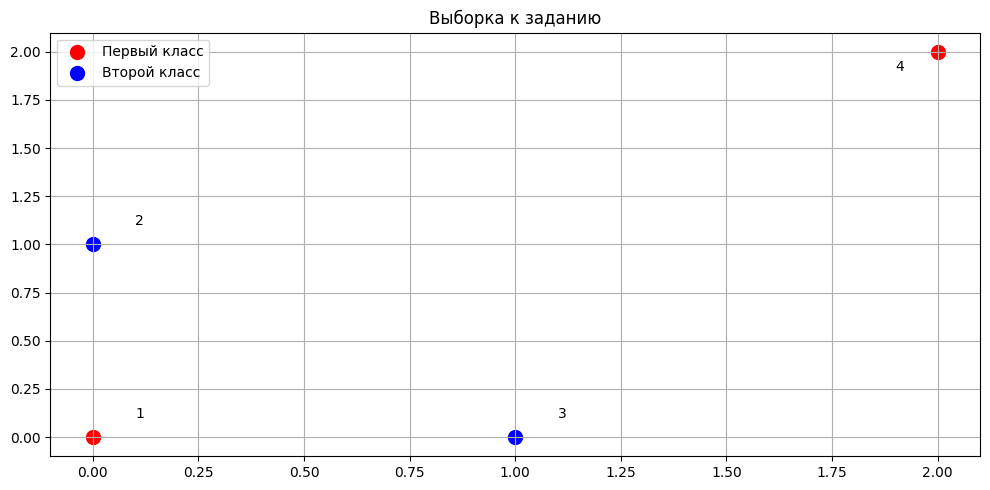

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter([0, 2], [0, 2], s=100, c='r', label='Первый класс')
ax.scatter([0, 1], [1, 0], s=100, c='b', label='Второй класс')

ax.annotate('1', (0.1, 0.1))
ax.annotate('2', (0.1, 1.1))
ax.annotate('3', (1.1, 0.1))
ax.annotate('4', (1.9, 1.9))

ax.set_title('Выборка к заданию')
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Компактность кластеризации $s_i$:

$$
s_1 = s_4 = \sqrt{8} \approx 2.828,
\quad
s_2 = s_3 = \sqrt{2} \approx 1.414
$$

Отделимость кластеризации $d_i$:

$$
d_1 = \frac{||x_1 - x_2|| + ||x_1 - x_3||}{2} = \frac{1 + 1}{2} = 1,
\quad
d_4 = \frac{||x_4 - x_2|| + ||x_4 - x_3||}{2} = \frac{2.236 + 2.236}{2} = 2.236,
$$

$$
d_2 = d_3 = \frac{||x_2 - x_1|| + ||x_2 - x_4||}{2} = \frac{1 + 2.236}{2} = 1.618
$$

Силуэт каждого объекта $\text{sil}_i$:

$$
\text{sil}_1 = \frac{1 - 2.828}{2.828} \approx -0.646, \\
\text{sil}_4 = \frac{2.236 - 2.828}{2.828} \approx -0.209, \\
\text{sil}_2 = \text{sil}_3 = \frac{1.618 - 1.414}{1.618} \approx 0.126
$$

Усредняем и получаем коэффициент силуэта:

$$
S = \frac{-0.646 - 0.209 + 0.126 + 0.126}{4} \approx -0.151
$$

In [ ]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [2, 2]
])

labels = np.array([1, 2, 2, 1])

score = silhouette_score(X, labels)
print(f"Silhouette coefficient: {score:.3f}")

Silhouette coefficient: -0.151


### B-Cubed

Пусть существует разметка $(y_1, ... , y_l)$, не участвующая в обучении. Мы не использовали эту разметку в качестве дополнительного признака, так как нам не хочется мотивировать модель данным признаком. Тогда предлагается ввести оценку качества алгоритма кластеризации при помощи внешней разметки, саму же разметку тогда называют *gold standard*.

Один из вариантов учесть gold standard разметку — внешняя метрика B-Cubed. Данная метрика позволяет определять следующие особенности кластеризации:
1. **Гомогенность.** Базовое свойство разделения разных объектов в разные кластеры:




2. **Полнота.** Один кластер не должен дробиться на несколько маленьких:



3. **Rag-bag.** Весь мусор должен быть в одном "мусорном"кластере, чтобы остальные кластеры были "чистыми":



4. **Cluster size vs. quantity.** Лучше испортить один кластер с целью улучшить качество множества других:



Пусть $L(x)$ — gold standard, $C(x)$ — номер кластера, выдаваемый рассматриваемым алгоритмом.

Рассмотрим несколько величин:
$$
\text{Correctness}(x, x^{\prime}) = \begin{cases}
1 , C(x) = C(x^{\prime}) ∧ L(x) = L(x^{\prime})\\
0 , иначе
\end{cases}
$$
$$
\text{Precision-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:C(x)=C(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$
$$
\text{Recall-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:L(x)=L(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$

Тогда,
$$
\text{B-Cubed} = F_{1} = 2\frac{\text{Precision-BCubed}\times\text{Recall-BCubed}}{\text{Precision-BCubed}+\text{Recall-BCubed}}
$$

#### <font color='DarkOrange'>**Задание 1.с.3 [unittests, 2 баллa]**</font>
Реализуйте вычисление метрики B-Cubed. Подробная спецификация и описание входных данных к тестам указаны в **описании задания**.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов.
2. Использование циклов запрещено
3. Обратите внимание на параметр `where` у функций-агрегаторов в `numpy` ($numpy \geq 1.20.0$).
4. Запрещено использовать любые библиотечные реализации B-Cubed.

**Входные данные тестов удовлетворяют одному из следующих ограничений:**
1. Число объектов n ⩽ 1000, число подтестов в одном тесте T ⩽ 70

**Несколько важных замечаний:**

<font color='OrangeRed'>**Замечание:**</font> Запрещается пользоваться библиотеками, импорт которых не объявлен в файле с шаблонами функций.

<font color='OrangeRed'>**Замечание:**</font> Задания, в которых есть решения, содержащие в каком-либо виде взлом тестов, дополнительные импорты и прочие нечестные приемы, будут автоматически оценены в $0$ баллов без права пересдачи задания.

<font color='OrangeRed'>**Замечание:**</font> Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные). В случае возникновения ошибки **Time limit** проверьте код на соответствие числа используемых циклов с требованиями к реализации.

<font color='OrangeRed'>**Замечание:**</font> Для самопроверки доступны как публичные тесты (смотрите **описание задания**), так и тесты внутри Jupyter Notebook

In [24]:
def bcubed_score(true_labels, predicted_labels):
    """
    :param np.ndarray true_labels: Непустой одномерный массив меток объектов
    :param np.ndarray predicted_labels: Непустой одномерный массив меток объектов
    :return float: B-Cubed для объектов с истинными метками true_labels и предсказанными метками predicted_labels
    """
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)
    n = len(true_labels)

    # C(i) == C(j), L(i) == L(j)
    # correctness_matrix[i, j] == True: объекты i и j корректно сгруппированы вместе
    correctness_matrix = np.equal.outer(
        predicted_labels, predicted_labels
    ) & np.equal.outer(true_labels, true_labels)

    # вычисление precision-bcubed для каждого объекта
    cluster_sizes = np.sum(np.equal.outer(predicted_labels, predicted_labels), axis=1)
    precision_bcubed_per_object = np.sum(correctness_matrix, axis=1) / cluster_sizes

    # вычисление recall-bcubed для каждого объекта
    gold_sizes = np.sum(np.equal.outer(true_labels, true_labels), axis=1)
    recall_bcubed_per_object = np.sum(correctness_matrix, axis=0) / gold_sizes

    # их усреднение
    precision_bcubed = np.mean(precision_bcubed_per_object)
    recall_bcubed = np.mean(recall_bcubed_per_object)

    if precision_bcubed + recall_bcubed == 0:
        return 0.0

    # F_1-bcubed
    return 2 * (precision_bcubed * recall_bcubed) / (precision_bcubed + recall_bcubed)

<a id='task_1.c.3'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты:

In [21]:
assert np.allclose(bcubed_score(np.array([1]), np.array([1])), 1.0)
assert np.allclose(bcubed_score(np.array([1]), np.array([2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 1])), 2.0 / 3)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([43, 12])), 1.0)
assert np.allclose(
    bcubed_score(np.array([1, 1, 2, 2]), np.array([1, 1, 1, 2])), 12.0 / 17
)
assert np.allclose(
    bcubed_score(np.array([1, 2, 3, 4, 5]), np.array([1, 1, 1, 2, 2])), 4.0 / 7
)

#### <font color='DarkOrange'>**Задание 1.с.4 [кросспроверка, 1 балл][код, вопрос]** </font>
<a id='task_1.c.4'></a>
* Для каждого из трёх алгоритмов кластеризации переберите основные параметры (`n_clusters`, `eps`, `min_samples`) и замерьте качество кластеризации многомерных данных с помощью коэффициента силуэта и метрики B-Cubed.
* Для каждого из алгоритмов на одной фигуре изобразите четыре графика — в первой строке два графика с зависимостью коэффициента силуэта и метрики B-Cubed от варьируемого параметра. Во второй строке — визуализация кластеризации с оптимальным параметром, выбранным с помощью первой и второй метрики (можете использовать `plot_2d_data` с параметром `ax`). Для DBSCAN перебирайте оба параметра одновременно и изобразите 2d-heatmap для каждой из метрик. Можете использовать [вспомогательные функции для создания heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).
* Совпали ли оптимальные параметры, определённые по этим метрикам? Совпали ли они с теми параметрами которые вы подобрали в предыдущем задании? Предположите почему они совпали/не совпали.
* Можно ли использовать данные метрики для оценки кластеризации между разными алгоритмами? Какая из них лучше отражает качество?

##### KMeans

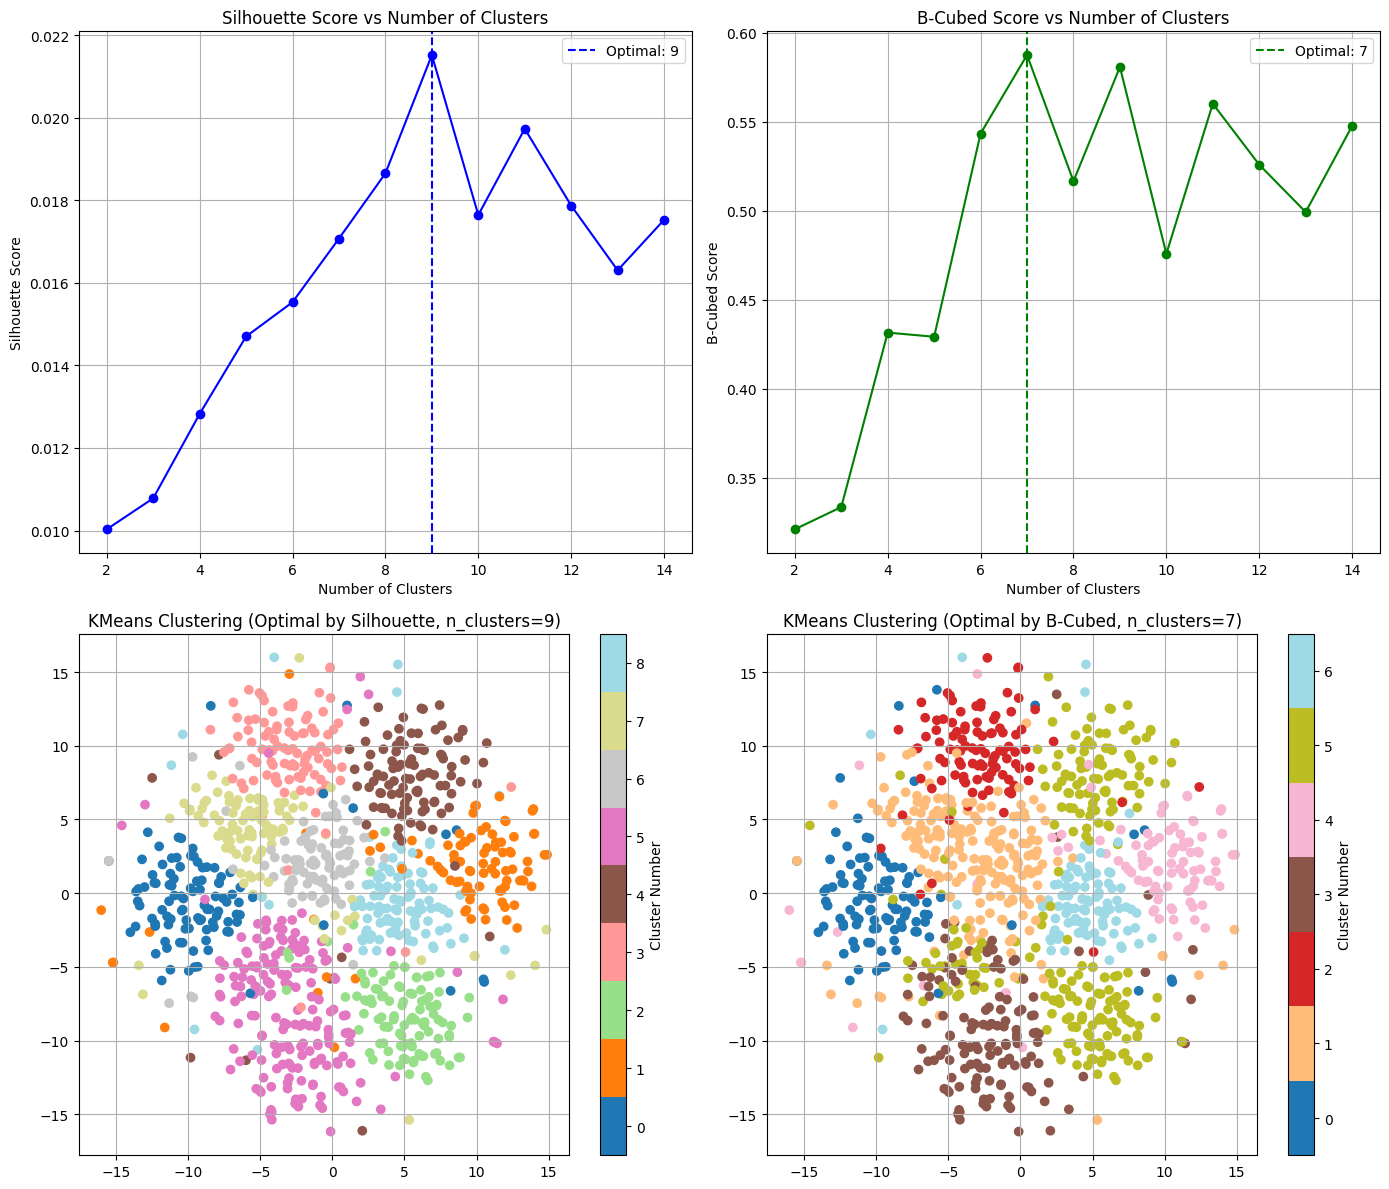

In [29]:
n_clusters_range = range(2, 15)

silhouette_scores = []
bcubed_scores = []

for n_clusters in n_clusters_range:
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=6417)
    pred_labels = model.fit_predict(data_scaled)

    sil_score = silhouette_score(data_scaled, pred_labels)
    silhouette_scores.append(sil_score)

    b_score = bcubed_score(labels, pred_labels)
    bcubed_scores.append(b_score)

silhouette_scores = np.array(silhouette_scores)
best_sil_idx = np.argmax(silhouette_scores)
best_sil_clusters = n_clusters_range[best_sil_idx]

bcubed_scores = np.array(bcubed_scores)
best_bcubed_idx = np.argmax(bcubed_scores)
best_bcubed_clusters = n_clusters_range[best_bcubed_idx]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes[0, 0].plot(n_clusters_range, silhouette_scores, marker="o", color="blue")
axes[0, 0].set_title("Silhouette Score vs Number of Clusters")
axes[0, 0].set_xlabel("Number of Clusters")
axes[0, 0].set_ylabel("Silhouette Score")
axes[0, 0].grid()
axes[0, 0].axvline(
    best_sil_clusters,
    color="blue",
    linestyle="--",
    label=f"Optimal: {best_sil_clusters}",
)
axes[0, 0].legend()

axes[0, 1].plot(n_clusters_range, bcubed_scores, marker="o", color="green")
axes[0, 1].set_title("B-Cubed Score vs Number of Clusters")
axes[0, 1].set_xlabel("Number of Clusters")
axes[0, 1].set_ylabel("B-Cubed Score")
axes[0, 1].grid()
axes[0, 1].axvline(
    best_bcubed_clusters,
    color="green",
    linestyle="--",
    label=f"Optimal: {best_bcubed_clusters}",
)
axes[0, 1].legend()

model_sil = KMeans(n_clusters=best_sil_clusters, n_init="auto", random_state=6417)
labels_sil = model_sil.fit_predict(data_scaled)
plot_2d_data(
    data_tsne,
    labels_sil,
    title=f"KMeans Clustering (Optimal by Silhouette, n_clusters={best_sil_clusters})",
    ax=axes[1, 0],
)

model_bcubed = KMeans(n_clusters=best_bcubed_clusters, n_init="auto", random_state=6417)
labels_bcubed = model_bcubed.fit_predict(data_scaled)
plot_2d_data(
    data_tsne,
    labels_bcubed,
    title=f"KMeans Clustering (Optimal by B-Cubed, n_clusters={best_bcubed_clusters})",
    ax=axes[1, 1],
)

fig.tight_layout()
plt.show()

##### DBSCAN

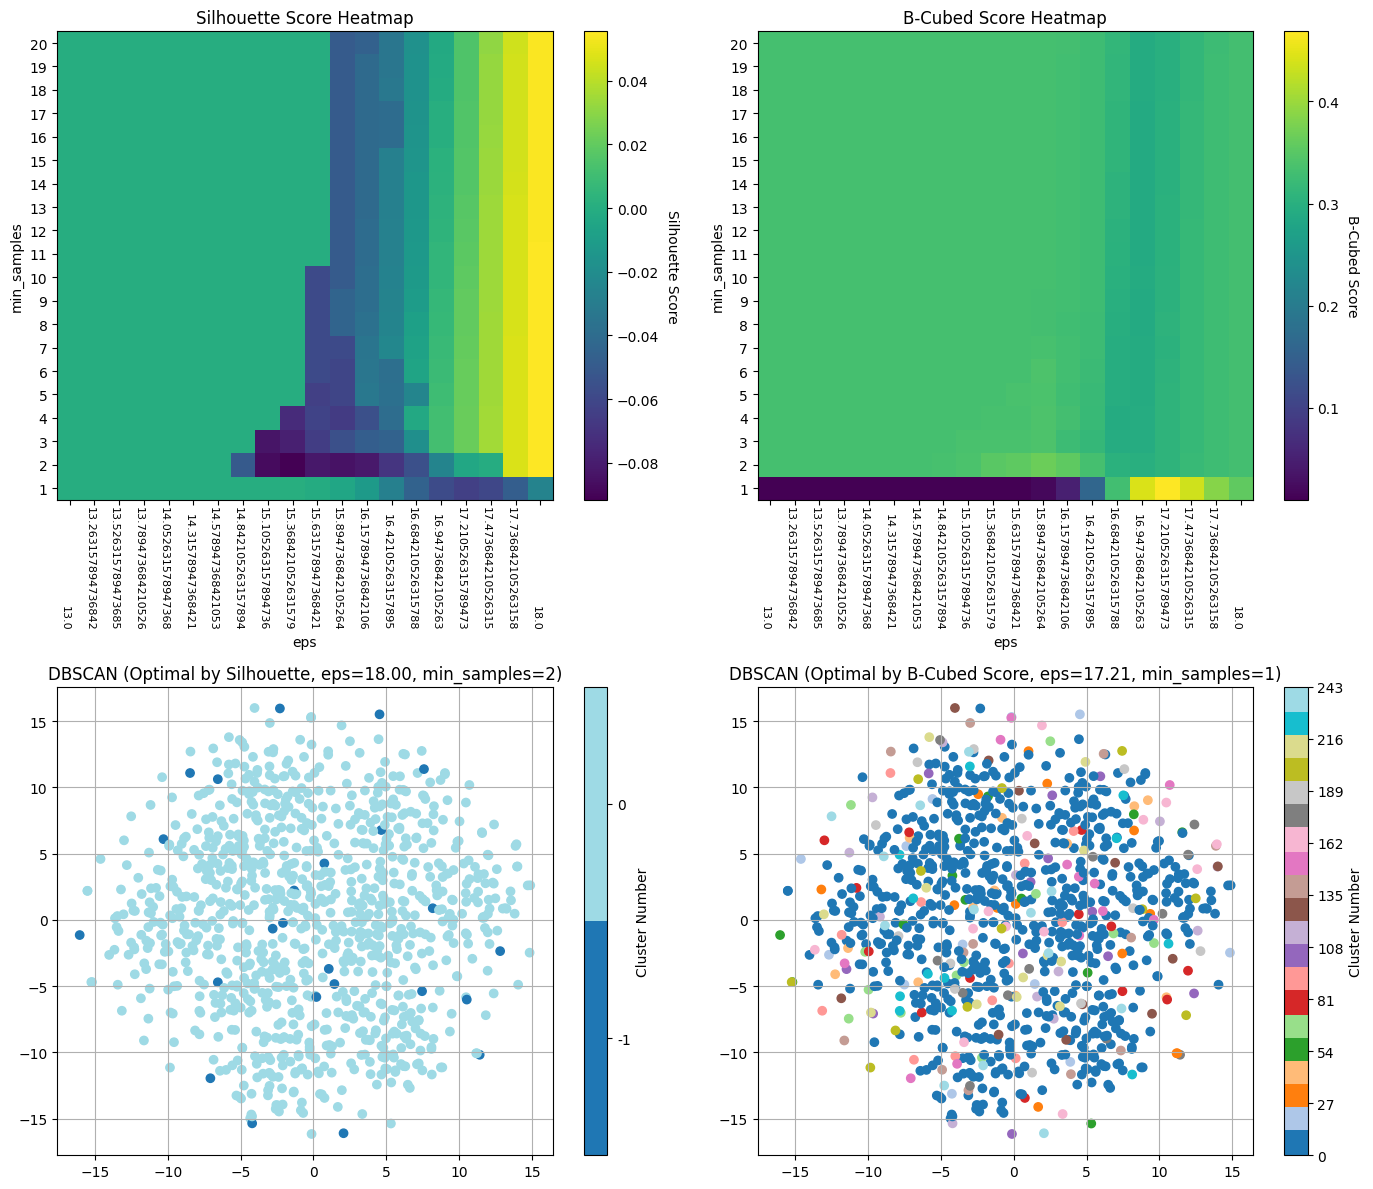

In [ ]:
def plot_heatmap(data, labels_x, labels_y, ax, title, cbar_label):
    im = ax.imshow(data, aspect="auto", origin="lower", cmap="viridis")

    ax.set_xticks(np.arange(len(labels_x)))
    ax.set_yticks(np.arange(len(labels_y)))
    ax.set_xticklabels(
        labels_x, fontsize=8, rotation=-90, ha="right", rotation_mode="anchor"
    )
    ax.set_yticklabels(labels_y, fontsize=10)
    ax.tick_params(axis="x", pad=90)

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")

    ax.set_xlabel("eps")
    ax.set_ylabel("min_samples")
    ax.set_title(title)


eps_values = np.linspace(13, 18, 20)
min_samples_values = [n for n in range(1, 21)]

sil_scores = []
bcubed_scores = []

for i, ms in enumerate(min_samples_values):
    sil_scores.append([])
    bcubed_scores.append([])
    for j, eps in enumerate(eps_values):
        pred_labels = DBSCAN(eps=eps, min_samples=ms).fit_predict(data_scaled)
        sil_scores[i].append(silhouette_score(data_scaled, pred_labels))
        bcubed_scores[i].append(bcubed_score(labels, pred_labels))

sil_scores = np.array(sil_scores)
best_sil_idx = np.nanargmax(sil_scores)
best_sil_coords = np.unravel_index(best_sil_idx, sil_scores.shape)
best_sil_eps = eps_values[best_sil_coords[1]]
best_sil_min_samples = min_samples_values[best_sil_coords[0]]

bcubed_scores = np.array(bcubed_scores)
best_bcubed_idx = np.nanargmax(bcubed_scores)
best_bcubed_coords = np.unravel_index(best_bcubed_idx, bcubed_scores.shape)
best_bcubed_eps = eps_values[best_bcubed_coords[1]]
best_bcubed_min_samples = min_samples_values[best_bcubed_coords[0]]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

plot_heatmap(
    sil_scores,
    eps_values,
    min_samples_values,
    axes[0, 0],
    "Silhouette Score Heatmap",
    "Silhouette Score",
)
plot_heatmap(
    bcubed_scores,
    eps_values,
    min_samples_values,
    axes[0, 1],
    "B-Cubed Score Heatmap",
    "B-Cubed Score",
)

plot_2d_data(
    data_tsne,
    DBSCAN(eps=best_sil_eps, min_samples=best_sil_min_samples).fit_predict(data_scaled),
    title=f"DBSCAN (Optimal by Silhouette, eps={best_sil_eps:.2f}, min_samples={best_sil_min_samples})",
    ax=axes[1, 0],
)

plot_2d_data(
    data_tsne,
    DBSCAN(eps=best_bcubed_eps, min_samples=best_bcubed_min_samples).fit_predict(
        data_scaled
    ),
    title=f"DBSCAN (Optimal by B-Cubed Score, eps={best_bcubed_eps:.2f}, min_samples={best_bcubed_min_samples})",
    ax=axes[1, 1],
)

plt.tight_layout()
plt.show()

##### Agglomerative Clustering

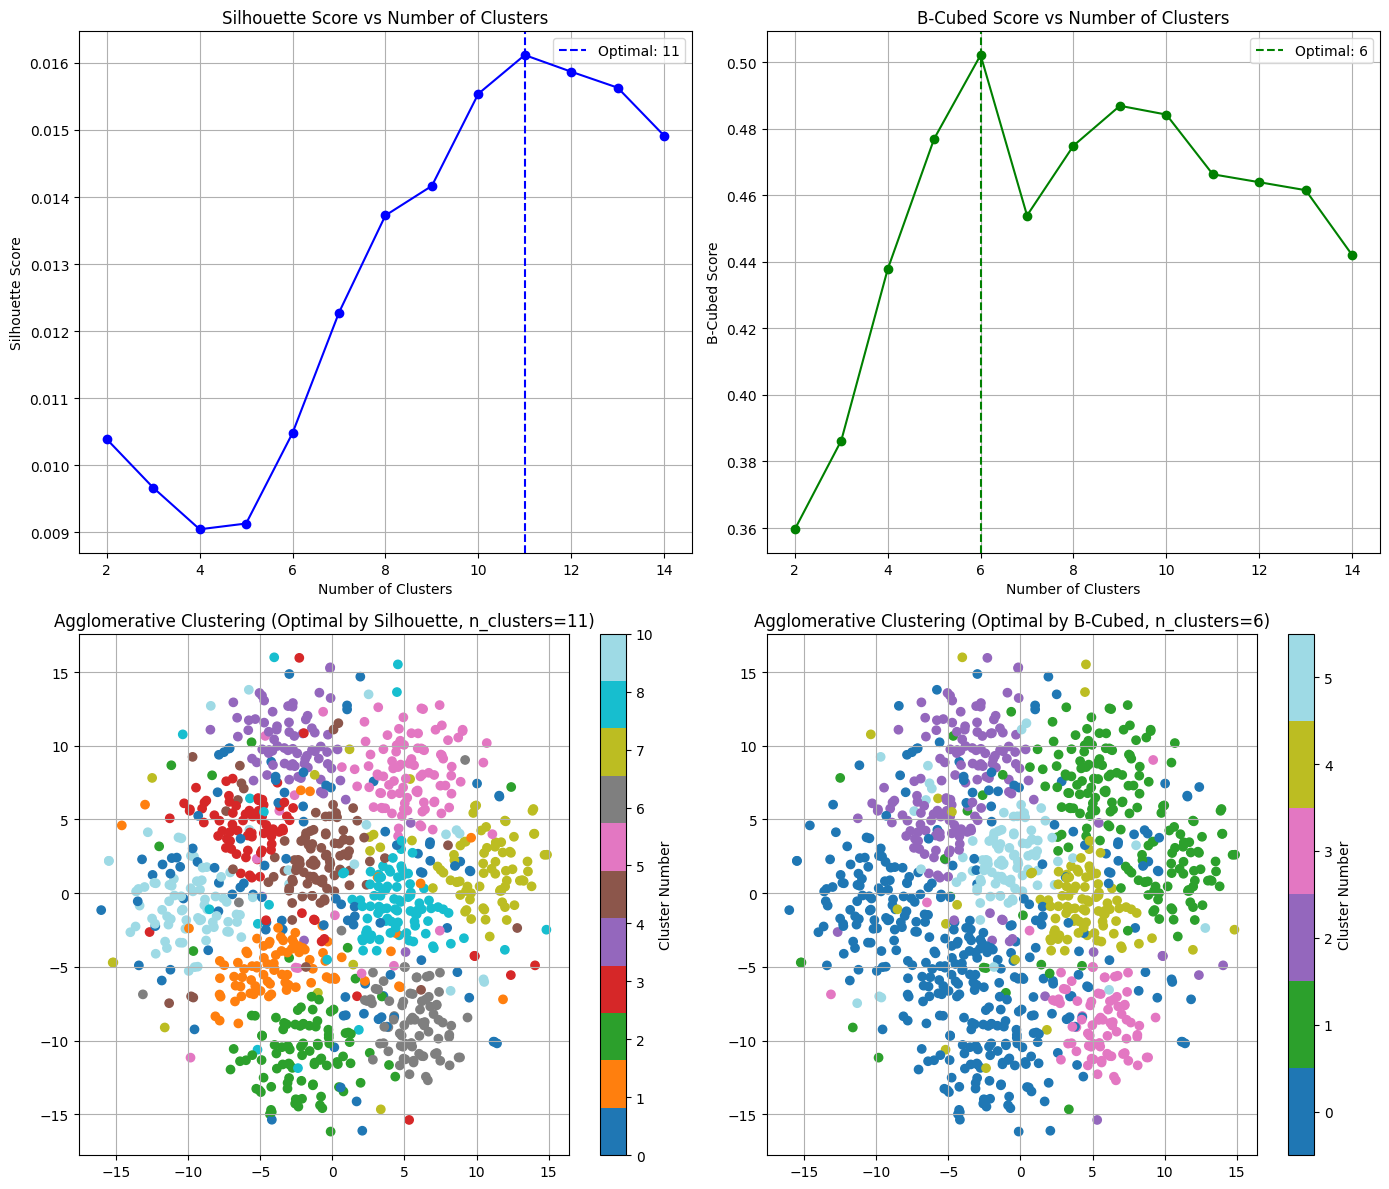

In [28]:
n_clusters_range = range(2, 15)
linkage_method = "ward"

silhouette_scores = []
bcubed_scores = []

for n_clusters in n_clusters_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    pred_labels = model.fit_predict(data_scaled)

    sil_score = silhouette_score(data_scaled, pred_labels)
    silhouette_scores.append(sil_score)

    b_score = bcubed_score(labels, pred_labels)
    bcubed_scores.append(b_score)

silhouette_scores = np.array(silhouette_scores)
best_sil_idx = np.argmax(silhouette_scores)
best_sil_clusters = n_clusters_range[best_sil_idx]

bcubed_scores = np.array(bcubed_scores)
best_bcubed_idx = np.argmax(bcubed_scores)
best_bcubed_clusters = n_clusters_range[best_bcubed_idx]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes[0, 0].plot(n_clusters_range, silhouette_scores, marker="o", color="blue")
axes[0, 0].set_title("Silhouette Score vs Number of Clusters")
axes[0, 0].set_xlabel("Number of Clusters")
axes[0, 0].set_ylabel("Silhouette Score")
axes[0, 0].grid()
axes[0, 0].axvline(
    best_sil_clusters,
    color="blue",
    linestyle="--",
    label=f"Optimal: {best_sil_clusters}",
)
axes[0, 0].legend()

axes[0, 1].plot(n_clusters_range, bcubed_scores, marker="o", color="green")
axes[0, 1].set_title("B-Cubed Score vs Number of Clusters")
axes[0, 1].set_xlabel("Number of Clusters")
axes[0, 1].set_ylabel("B-Cubed Score")
axes[0, 1].grid()
axes[0, 1].axvline(
    best_bcubed_clusters,
    color="green",
    linestyle="--",
    label=f"Optimal: {best_bcubed_clusters}",
)
axes[0, 1].legend()

model_sil = AgglomerativeClustering(
    n_clusters=best_sil_clusters, linkage=linkage_method
)
labels_sil = model_sil.fit_predict(data_scaled)
plot_2d_data(
    data_tsne,
    labels_sil,
    title=f"Agglomerative Clustering (Optimal by Silhouette, n_clusters={best_sil_clusters})",
    ax=axes[1, 0],
)

model_bcubed = AgglomerativeClustering(
    n_clusters=best_bcubed_clusters, linkage=linkage_method
)
labels_bcubed = model_bcubed.fit_predict(data_scaled)
plot_2d_data(
    data_tsne,
    labels_bcubed,
    title=f"Agglomerative Clustering (Optimal by B-Cubed, n_clusters={best_bcubed_clusters})",
    ax=axes[1, 1],
)

fig.tight_layout()
plt.show()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Оптимальные параметры, определённые по этим метрикам, различаются, так как метрики оценивают качество кластеризации по-разному. Силуэт (внутренняя метрика) оценивает схожесть объектов внутри своего кластера и их непохожесть на объекты из других кластеров, а B-Cubed (внешняя метрика) — соответствие кластеров истинной разметке

Силуэт нельзя использовать для сравнения кластеризации между разными алгоритмами, поскольку он плохо подходит для оценки результатов DBSCAN: может переоценивать или недооценивать качество DBSCAN (с точки зрения выделения смысловых групп и шума), ибо силуэт плохо учитывает особенности плотностных кластеров DBSCAN. А B-Cubed можно, B-Cubed правильно упорядочивает алгоритмы. Также B-Cubed удобен, если есть разметка и важно, чтобы кластеры соответствовали заранее определенным группам

Оптимальные параметры, определенные по метрикам и визуально, также различаются из-за субъективности визуальной оценки

## <font color='MediumSeaGreen'> **Задание 2 [Bonus][1 балл]** </font>



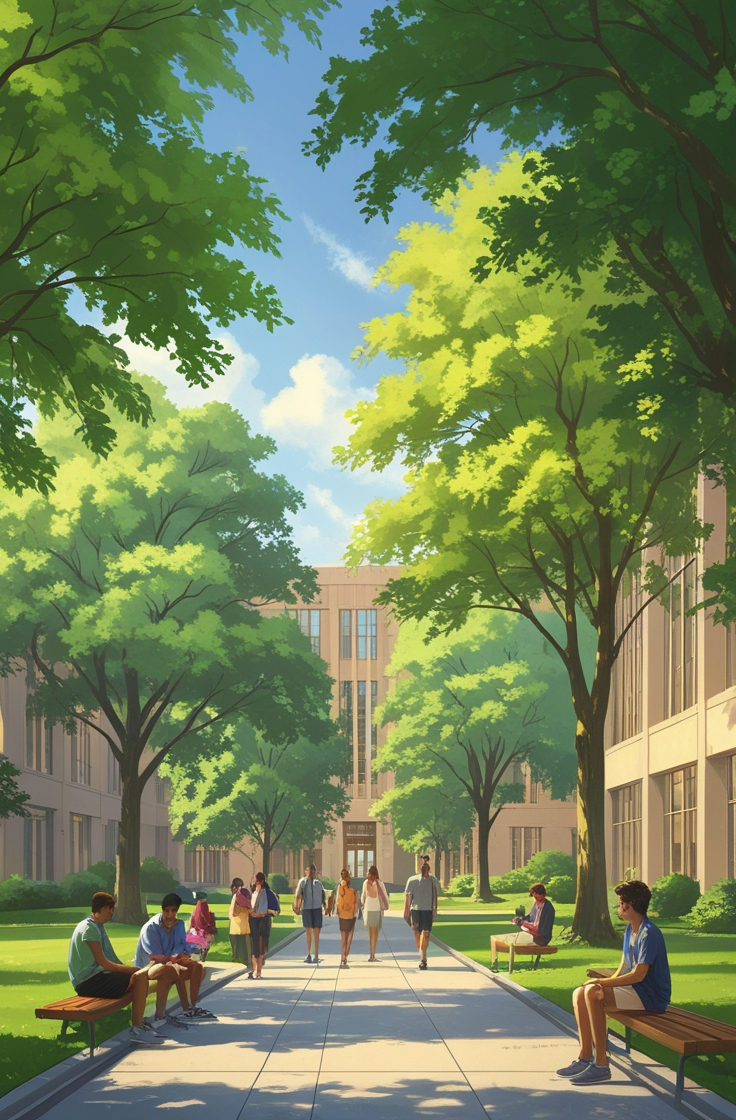

Подкиньте друг другу 3+ идеи, куда сходить/чем заняться на майских :)

Или вставьте/сгенерируйте любой смешной мем на тему весны/лета

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>  
Рекомендую выйти потрогать траву

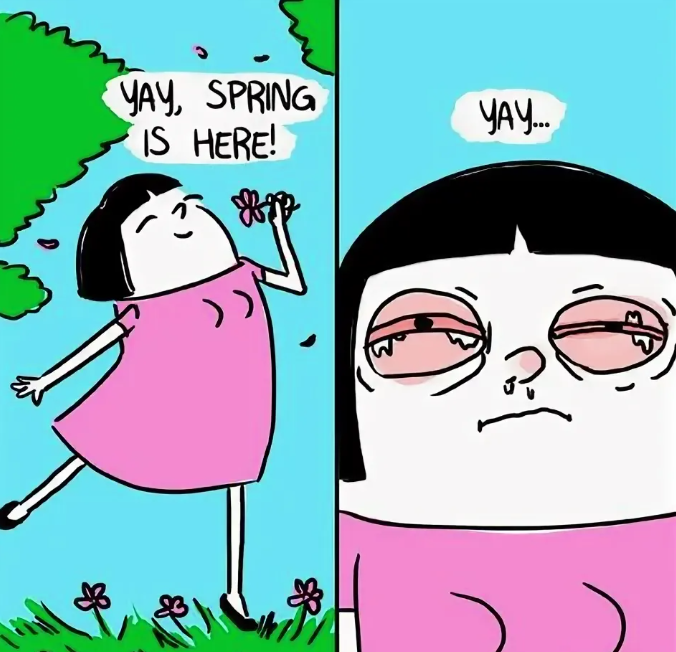